<a href="https://colab.research.google.com/github/Mayapremil/AIML---Course/blob/main/2313093_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read data
data= pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [12]:
# To identify Null Values & it's count
data.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,445
Measles,0


Row & Column
<class 'pandas.core.frame.DataFrame'>
Index: 2306 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2306 non-null   object 
 1   Year                             2306 non-null   int64  
 2   Status                           2306 non-null   object 
 3   Life expectancy                  2306 non-null   float64
 4   Adult Mortality                  2306 non-null   float64
 5   infant deaths                    2306 non-null   int64  
 6   Alcohol                          2306 non-null   float64
 7   percentage expenditure           2306 non-null   float64
 8   Hepatitis B                      1861 non-null   float64
 9   Measles                          2306 non-null   int64  
 10   BMI                             2306 non-null   float64
 11  under-five deaths                2306 non-null   int64  
 12  Polio       

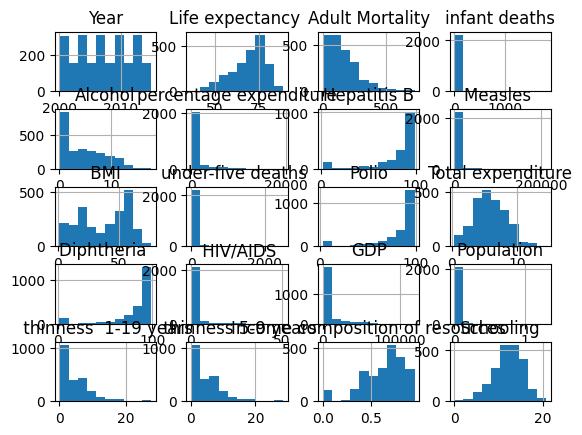

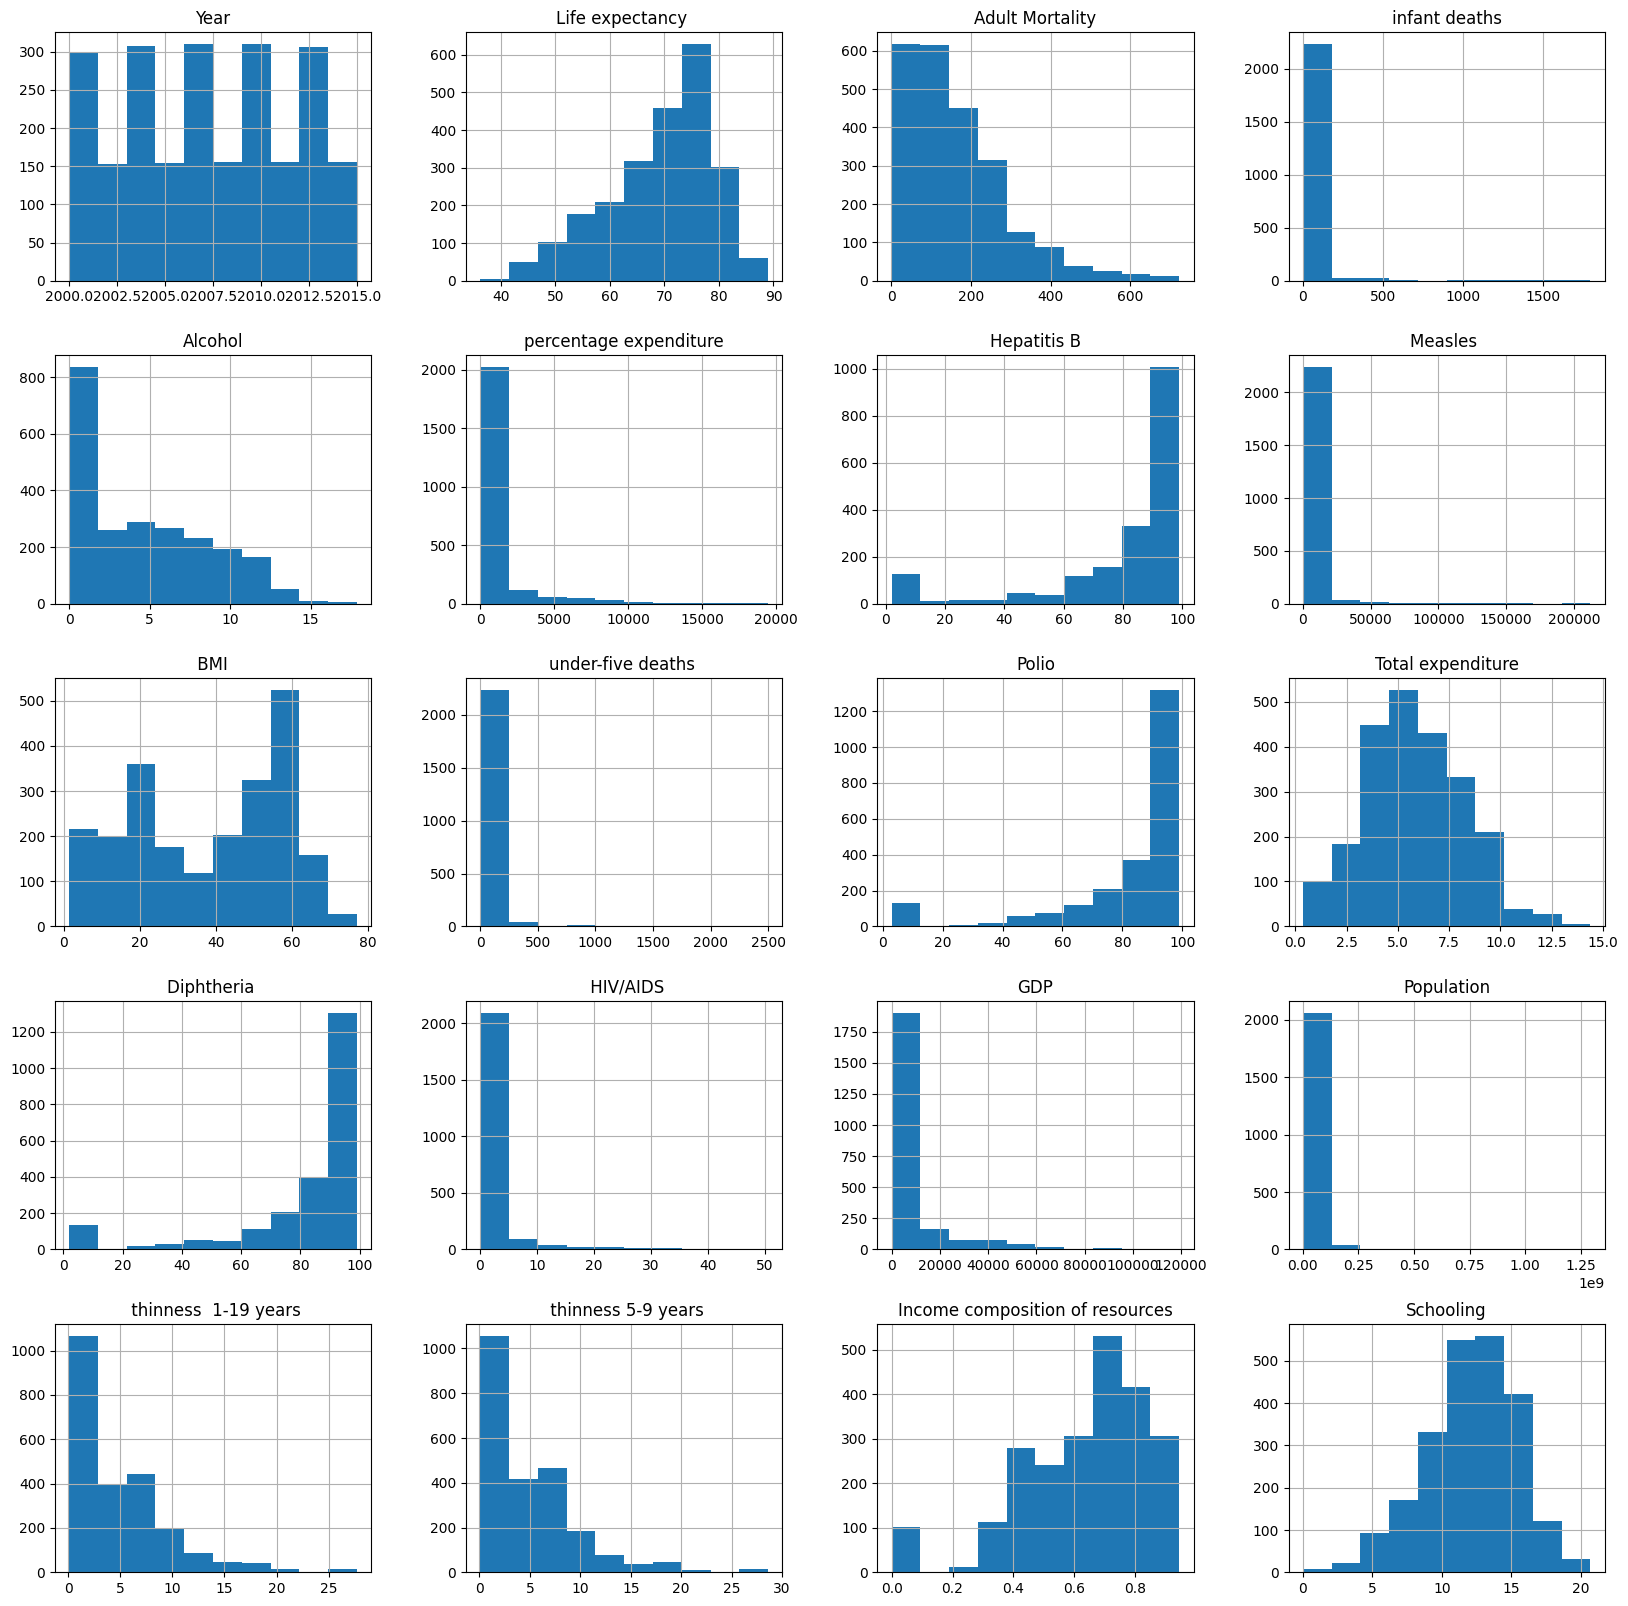

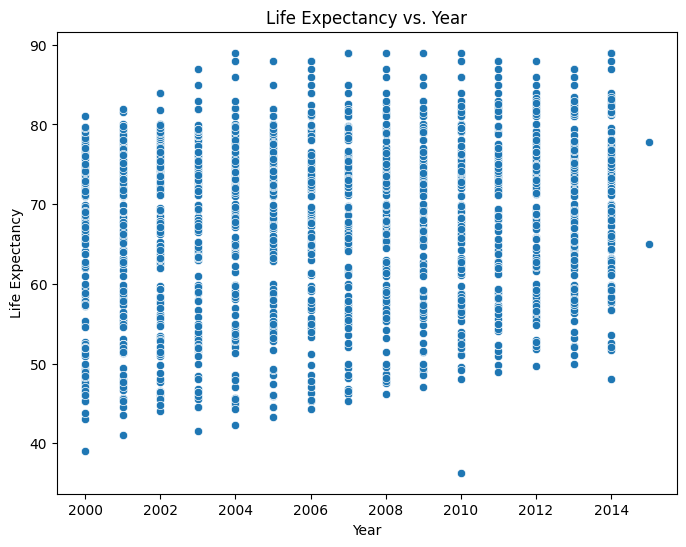

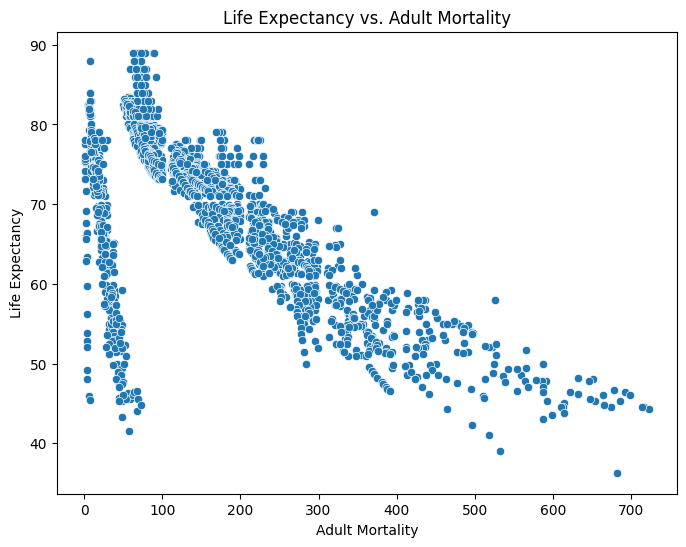

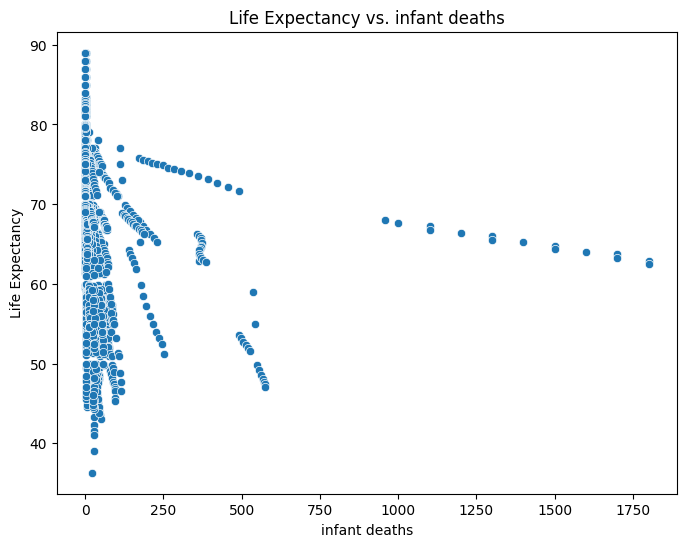

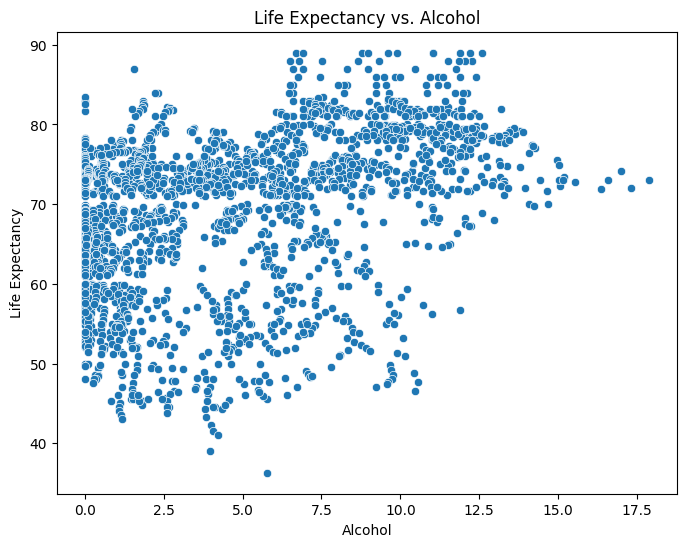

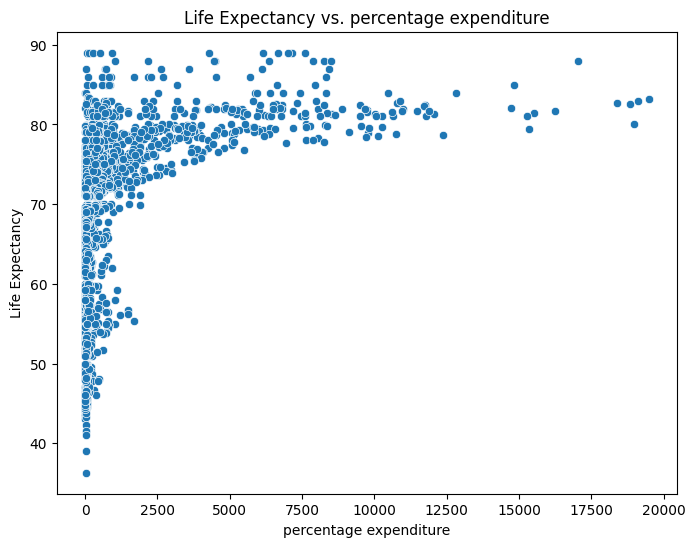

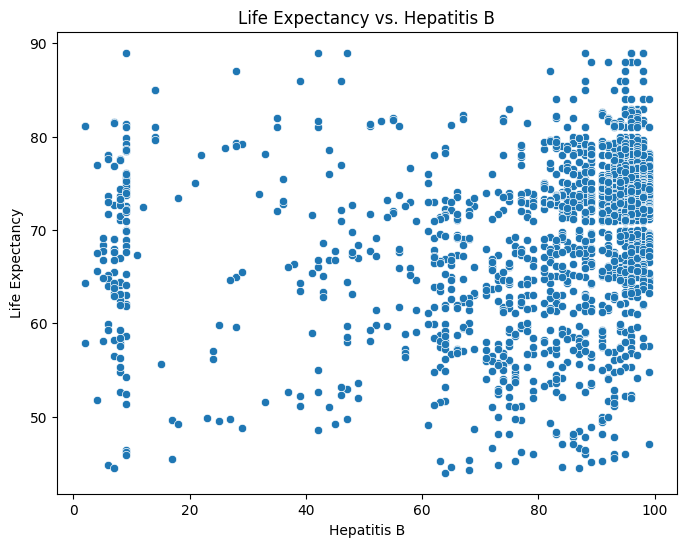

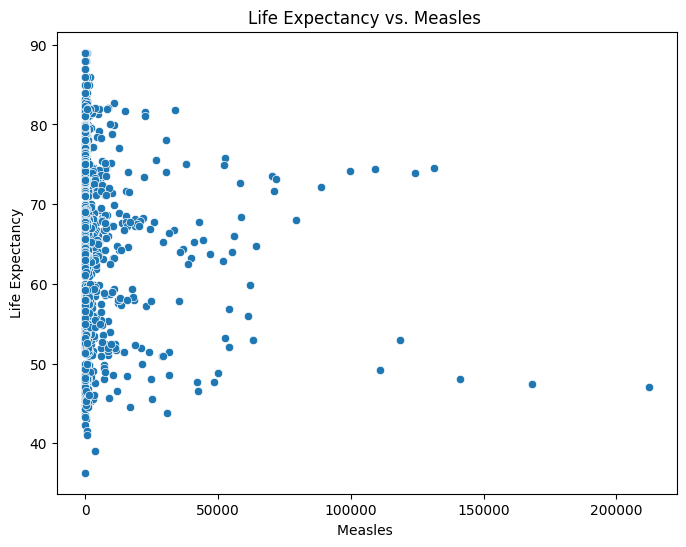

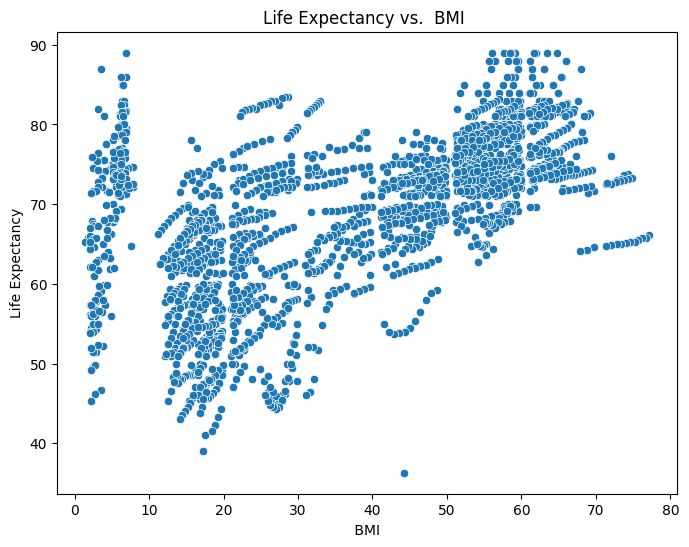

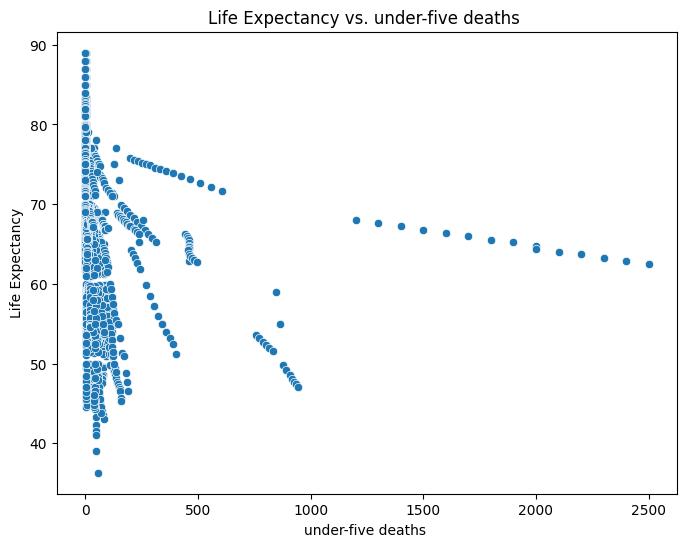

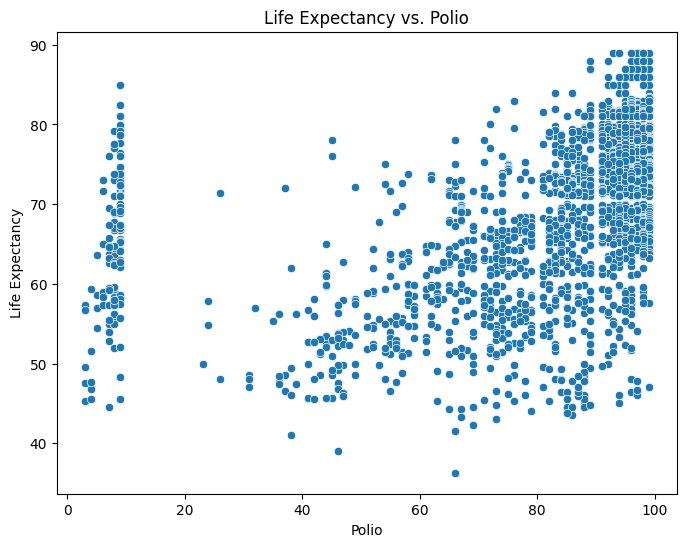

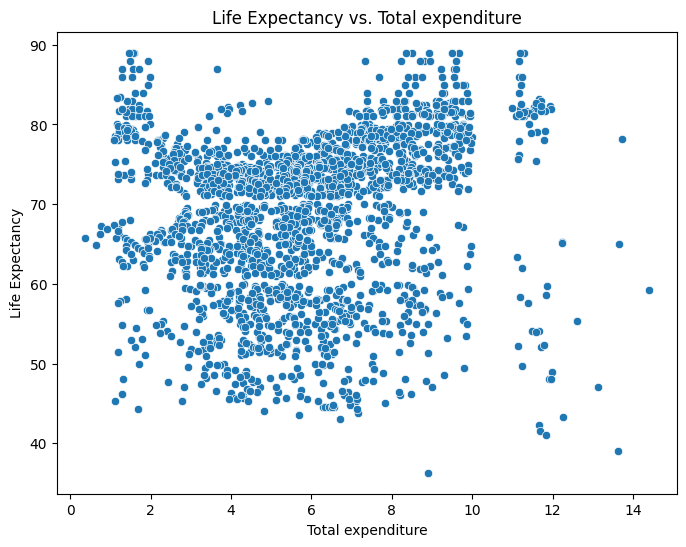

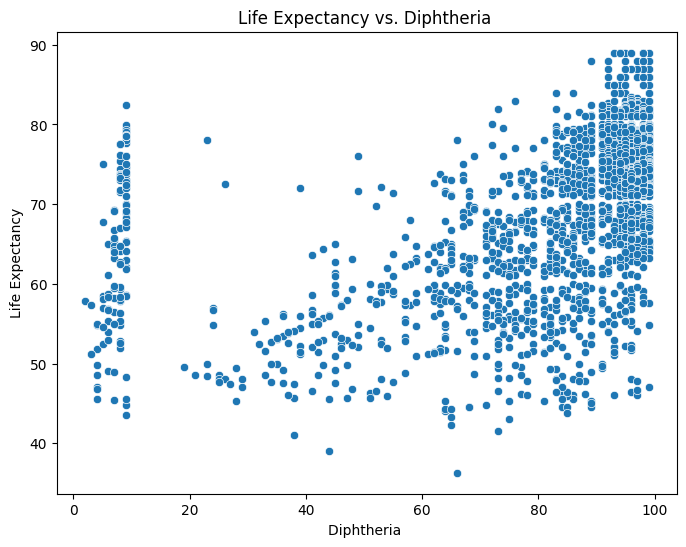

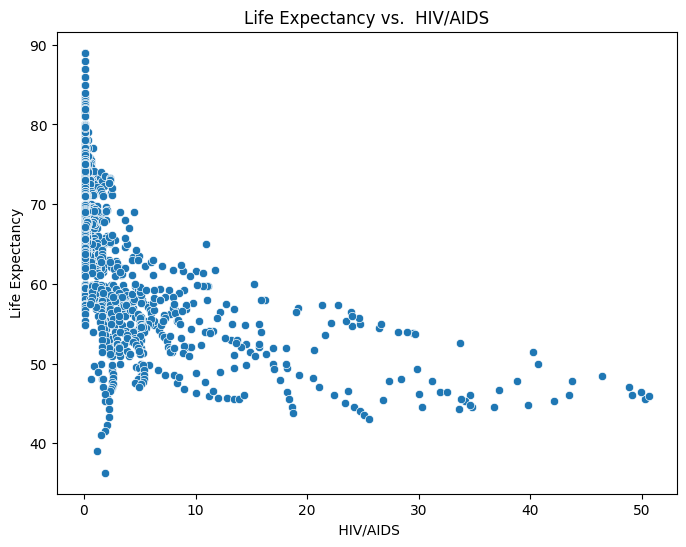

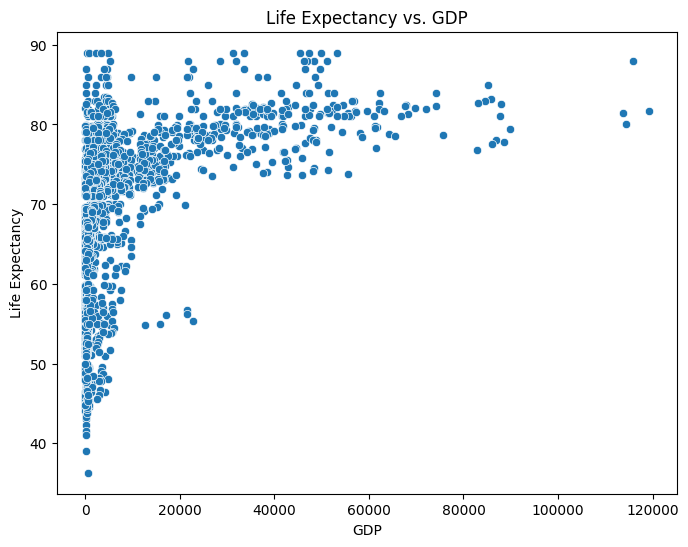

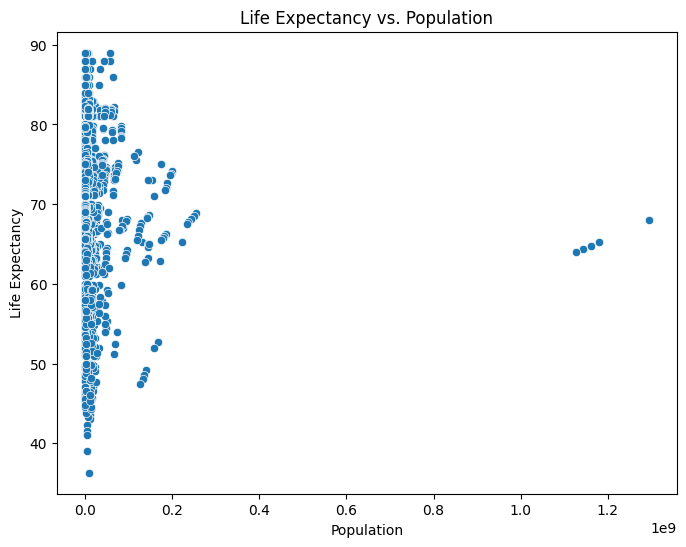

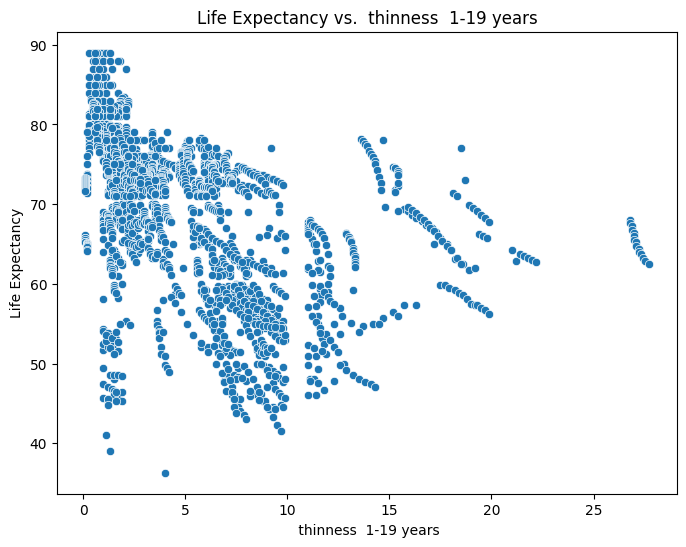

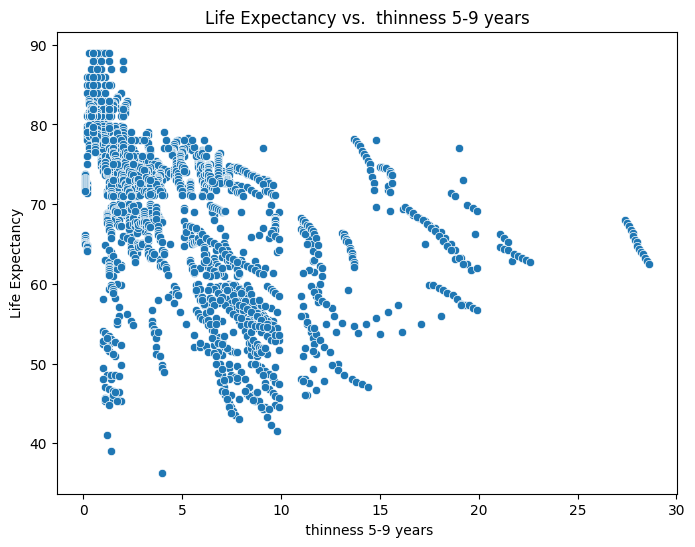

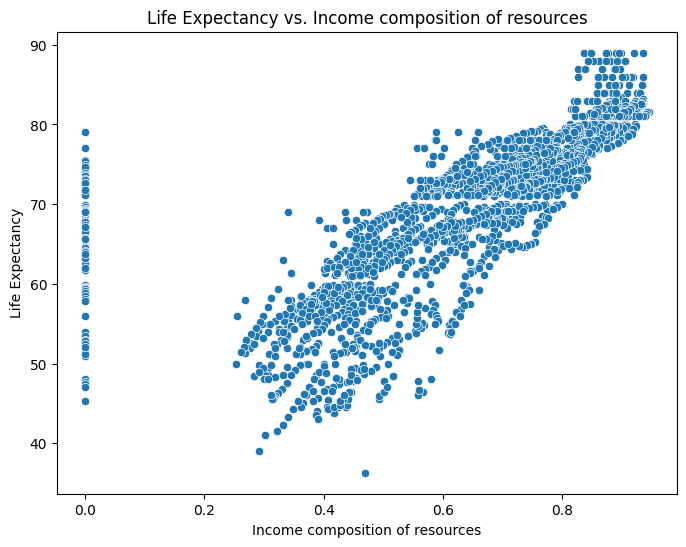

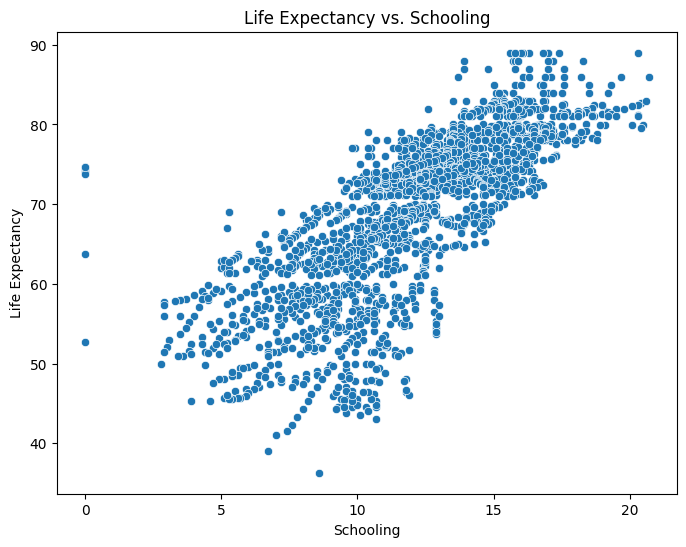

In [33]:
import seaborn as sns

# Read data
data = pd.read_csv('Life Expectancy Data.csv')

# Define threshold for null values
threshold = 1 # For example, drop rows with 1 or more null values

# Drop rows with null values exceeding the threshold
data = data[data.isnull().sum(axis=1) <= threshold]

data.isna().sum()

print("Row & Column")
data.shape


# Discriptive statistics
data.describe()

# descriptive Stat. including Categorical Variable
data.describe(include='all')

# Datatype
data.info()

# Histogram
data.hist()
plt.show()

# Histogram
data.hist(figsize=(20,20))
plt.show()


# Select only numeric features for scatter plots
numeric_features = data.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop('Life expectancy ')  # Exclude the target variable

# Create scatter plots
for feature in numeric_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.scatterplot(x=feature, y='Life expectancy ', data=data)
    plt.title(f'Life Expectancy vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')
    plt.show()

In [34]:


# Select only numeric features for correlation
numeric_features = data.select_dtypes(include=['number']).columns

# Calculate correlation matrix
correlation_matrix = data[numeric_features].corr()

# Get correlations with Life Expectancy
life_expectancy_correlations = correlation_matrix['Life expectancy '].drop('Life expectancy ')  # Exclude self-correlation

# Print correlation values
print("Correlation with Life Expectancy:")
print(life_expectancy_correlations)

Correlation with Life Expectancy:
Year                               0.161604
Adult Mortality                   -0.681454
infant deaths                     -0.181814
Alcohol                            0.384105
percentage expenditure             0.426407
Hepatitis B                        0.225727
Measles                           -0.149880
 BMI                               0.578457
under-five deaths                 -0.207047
Polio                              0.451167
Total expenditure                  0.179526
Diphtheria                         0.462550
 HIV/AIDS                         -0.576208
GDP                                0.461999
Population                        -0.022165
 thinness  1-19 years             -0.479585
 thinness 5-9 years               -0.475359
Income composition of resources    0.736324
Schooling                          0.764696
Name: Life expectancy , dtype: float64


In [53]:
# Assigning DV & IV
X = data[['Schooling']]
y = data["Life expectancy "]

# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

lr= LinearRegression()
lr.fit(X_train,y_train)

y_pred= lr.predict(X_test)

# R-Square [Strength of the model]
r2_score(y_test, y_pred)




0.5409202732699157

In [54]:
print(lr.intercept_)

lr.predict(X[0:1])

type(lr)

41.81243499548019


sklearn.linear_model._base.LinearRegression

In [55]:
#MLR
mlr= LinearRegression()

# Training the model
mlr.fit(X_train,y_train)

LinearRegression()

In [56]:
# Testing the model
y_pred= mlr.predict(X_test)

In [58]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMultiple Linear Regression")
print(f" Mean Squared Error: {mse:.4f}")
print(f" R² Score: {r2:.4f}")


Multiple Linear Regression
 Mean Squared Error: 41.5920
 R² Score: 0.5409


In [59]:
# Intercept
print("Intercept:", mlr.intercept_)

Intercept: 41.81243499548019


In [60]:
type(mlr)

sklearn.linear_model._base.LinearRegression

In [61]:
mlr.predict(X[0:5])

array([64.70256265, 64.47592772, 64.2492928 , 64.02265787, 63.34275309])

In [62]:
# To check the predicted values
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction.head()

,Actual,Predicted
1983,61.1,61.303039
591,71.4,67.422182
2283,72.9,72.408150
45,71.6,66.968912
1999,72.5,69.008626


In [63]:
# To Save the model
import pickle
with open ('startup.pkl','wb') as f:
    pickle.dump(mlr,f)

# To load the trained model
with open('startup.pkl','rb') as f:
  pickle.load(f)